**Topic**:        Challenge Set 5  
**Subject**:      Linear Regression  
**Date**:         02/02/2018  
**Name**:         Christine Liu

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
%matplotlib inline  

/Users/cliuless/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/cliuless/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('challenges_data/2013_movies.csv')

#### Challenge 1  
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic   total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions   against actual outcome. Make a histogram of residuals. How are the residuals distributed?  

In [4]:
# # make X a series of ones that is the length of y
X = pd.DataFrame()
X['Ones'] = np.ones(len(df))


In [9]:
#choose dependent variable, get it into y
y = df.DomesticTotalGross.reset_index(drop=True)
# y_series=y.iloc[:,0]

In [19]:
#OLS = ordinary least squares
model = sm.OLS(y, X)
# Fit your model to your training set
fit = model.fit()

ypred = fit.predict(X)
# Print summary statistics of the model's performance
fit.summary()

/Users/cliuless/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Fri, 02 Feb 2018   Prob (F-statistic):                nan
Time:                        20:44:43   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones        1.006e+08   8.74e+06     11.510      0.000    8.33e+07    1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Y Test Actual')

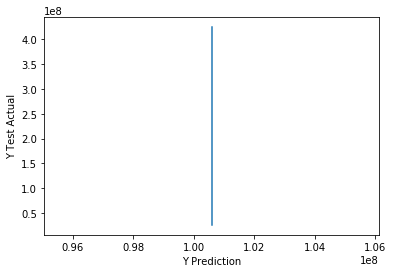

In [20]:
#plot of actual vs prediction based on model

plt.plot(ypred,y)
plt.xlabel("Y Prediction")
plt.ylabel("Y Test Actual")

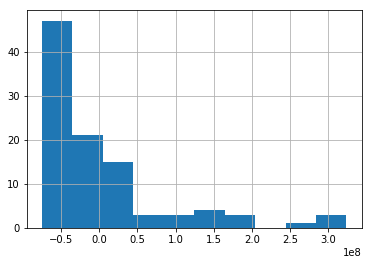

In [21]:
fit.resid.hist()

(array([ 47.,  21.,  15.,   3.,   3.,   4.,   3.,   0.,   1.,   3.]),
 array([ -7.50286242e+07,  -3.51186446e+07,   4.79133498e+06,
          4.47013146e+07,   8.46112942e+07,   1.24521274e+08,
          1.64431253e+08,   2.04341233e+08,   2.44251213e+08,
          2.84161192e+08,   3.24071172e+08]),
 <a list of 10 Patch objects>)

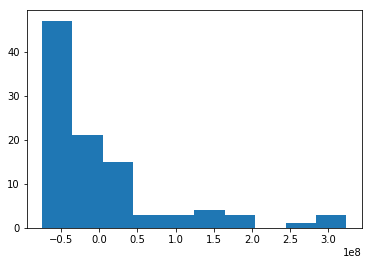

In [22]:
# ASK - why does this descrepancy keep happening
plt.hist(y - ypred, bins = 10)

In [40]:
# #data cleaning on whole DF

# #investing NAs, NAs only appear in Budget & Director, ignore for now
# df[df.isna().any(axis = 1)].head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00


In [50]:
# #split up training, test data, test size to be ~30% 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [51]:
# # creating sklearn model
# # Create an empty model
# lr = LinearRegression()

# # Fit the model to the training data
# lr.fit(X, y)
# lr.score(X_train,y_train), lr.score(X_test,y_test), lr.score(X,y)

(-8.5165319163582609e-06, -3.8148665152837324e-05, 0.0)

Text(0,0.5,'Y Test Actual')

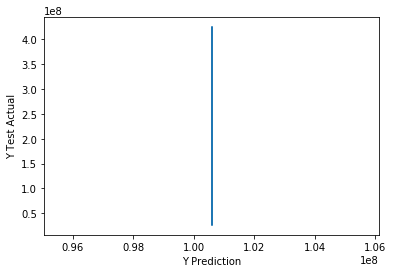

In [52]:
# #plot of actual vs prediction based on model
# y_pred = lr.predict(X_test)
# plt.plot(y_pred,y_test)
# plt.xlabel("Y Prediction")
# plt.ylabel("Y Test Actual")

In [70]:
# #residual plot
# # ASK - this isn't working - the x axis clearly doesn't match up
# plt.plot(lr.predict(X_train), lr.predict(X_train) - y_train, 'bo')
# # plt.plot(lr.predict(X_test), y_test, 'co')

In [71]:
# # ASK - why does this descrepancy keep happening
# # plt.hist((lr.predict(X_train) - y_train), bins = 10)
# (lr.predict(X) - y).hist(bins = 10)

In [60]:
# #mean squared error, extremely high
# np.mean((lr.predict(X_train)-y_train)**2)

DomesticTotalGross    7.102598e+15
dtype: float64

#### Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's   happening in the model?  

_How can you interpret the results of this model? What does it predict? Make a plot of predictions   against actual outcome. Make a histogram of residuals. How are the residuals distributed?  _

In [23]:
y2 = df.DomesticTotalGross.reset_index(drop = True)


In [25]:
X2 = df.copy()
X2 = df.Runtime.reset_index(drop = True)


0    146
1    129
2    108
3     98
4    143
Name: Runtime, dtype: int64

In [42]:
#split up training, test data, test size to be ~30% 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.to_frame(), y2.to_frame(), test_size = .3)


In [43]:
lr2 = LinearRegression()
lr2.fit(X2_train,y2_train)

lr2.score(X2_train,y2_train), lr2.score(X2_test,y2_test)

(0.095282225262252607, 0.027994306883688872)

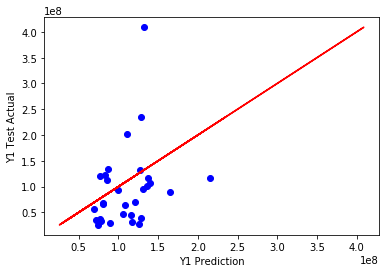

In [98]:
#actual vs prediction
plt.plot(lr2.predict(X2_test), y2_test, 'bo')
plt.xlabel("Y1 Prediction")
plt.ylabel("Y1 Test Actual")
plt.plot(y2_test, y2_test,'r')

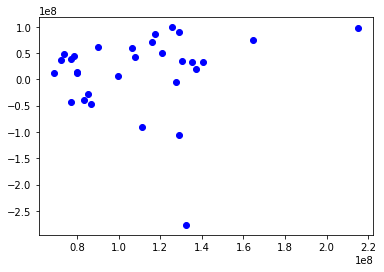

In [50]:
#  Make a histogram of residuals. How are the residuals distributed?

#graph of residuals
plt.plot(lr2.predict(X2_test), lr2.predict(X2_test) - y2_test,'bo')

# plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'orange')
# plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'g')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f05b390>]], dtype=object)

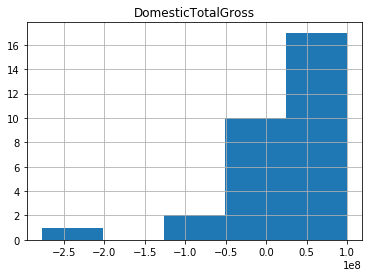

In [51]:
# plt.hist(lr1.predict(X1_test) - y1_test, bins = 10)
(lr2.predict(X2_test) - y2_test).hist(bins = 5)

/Users/cliuless/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


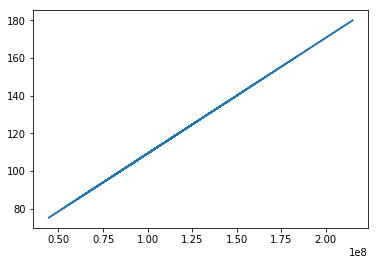

In [62]:
# Also add plots of model prediction against your feature variable 
# How can you interpret what's happening in the model?
plt.plot(lr2.predict(X2.reshape(-1,1)), X2.reshape(-1,1))

/Users/cliuless/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


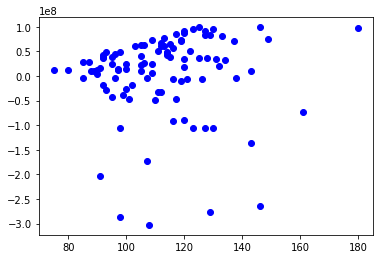

In [68]:
# and residuals against feature variable
# this is super random, what does that mean
plt.plot(X2.reshape(-1,1), lr2.predict(X2.reshape(-1,1)) - y2.reshape(-1,1),'bo')


#### Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text    into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's   happening in the model?  

_How can you interpret the results of this model? What does it predict? Make a plot of predictions   against actual outcome. Make a histogram of residuals. How are the residuals distributed?  _

In [72]:
X3 = df.copy()

In [73]:
X3 = X3.Rating.to_frame()
y3 = df.DomesticTotalGross.reset_index(drop = True).to_frame()

In [74]:
# making dummy variables
X3 = X3.Rating.str.get_dummies()

In [75]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .3, random_state = 42)

In [76]:
lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)
lr3.score(X3_test,y3_test), lr3.score(X3,y3), lr3.score(X3_train,y3_train)

(0.061944191360712608, 0.10825109566410362, 0.12699567143953361)

Text(0,0.5,'Y3 Test Actual')

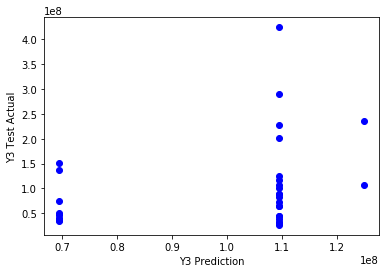

In [77]:
#actual vs prediction
plt.plot(lr3.predict(X3_test), y3_test, 'bo')
plt.xlabel("Y3 Prediction")
plt.ylabel("Y3 Test Actual")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f367160>]], dtype=object)

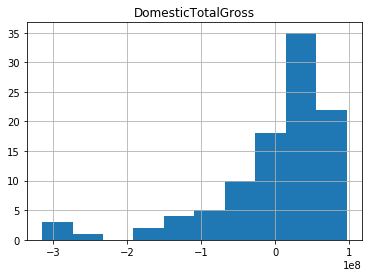

In [78]:
#histogram of residuals
(lr3.predict(X3) - y3).hist()
# plt.hist((lr3.predict(X3) - y3))

#### Challenge 3.b, also with ones

In [79]:
X3b = df.copy()
X3b = X3b.Rating.to_frame()
y3b = df.DomesticTotalGross.reset_index(drop = True).to_frame()


In [80]:
X3b = X3b.Rating.str.get_dummies()
# making dummy variables then add ones
X3b['ones'] = np.ones(len(y3b))

In [81]:
X3b_train, X3b_test, y3b_train, y3b_test = train_test_split(X3b, y3b, test_size = .3, random_state = 42)

In [82]:
lr3b = LinearRegression()
lr3b.fit(X3b_train, y3b_train)
lr3b.score(X3b_test,y3b_test), lr3b.score(X3b,y3b), lr3b.score(X3b_train,y3b_train)

(0.061944191360712608, 0.10825109566410362, 0.1269956714395335)

Text(0,0.5,'Y3 Test Actual')

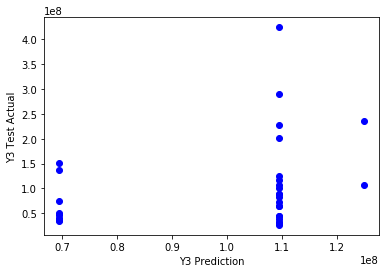

In [83]:
#actual vs prediction
plt.plot(lr3b.predict(X3b_test), y3b_test, 'bo')
plt.xlabel("Y3 Prediction")
plt.ylabel("Y3 Test Actual")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f602e80>]], dtype=object)

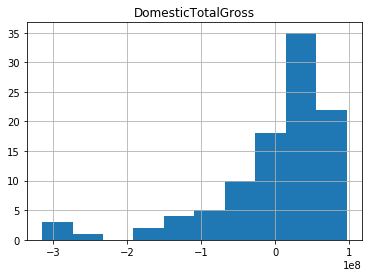

In [84]:
#histogram of residuals
(lr3b.predict(X3b) - y3b).hist()
# plt.hist((lr3.predict(X3) - y3))

#### Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [85]:
#data cleaning on whole DF

#investing NAs, NAs only appear in Budget & Director, ignore for now
df_budget_NA = df[df.isna().Budget]

In [86]:
df1 = df[np.isfinite(df['Budget'])]


In [87]:
df1 = df1.copy()
interm_df= df1[['Budget', 'Runtime']].reset_index(drop = True)


In [88]:
X4 = df1.Rating.str.get_dummies().reset_index(drop = True)
# making dummy variables then add ones
X4['ones'] = np.ones(len(X4))
X4.reset_index(drop= True);

In [89]:
#only able to do after resetting index
X4 = X4.join(interm_df)

In [90]:
y4 = df1.DomesticTotalGross.reset_index(drop = True).to_frame()

In [91]:
#check shape
X4.shape, y4.shape

((89, 6), (89, 1))

In [92]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = .3, random_state = 42)

In [93]:
lr4 = LinearRegression()
lr4.fit(X4_train, y4_train)
lr4.score(X4_train,y4_train), lr4.score(X4,y4), lr4.score(X4_test, y4_test)
#R2 is much higher now

(0.25680114021857559, 0.28999659283207424, 0.3659603176601951)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f877908>]], dtype=object)

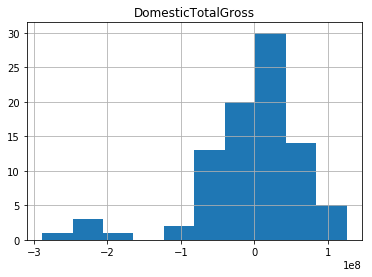

In [94]:
#histogram of residuals
(lr4.predict(X4) - y4).hist()
# plt.hist((lr3.predict(X3) - y3))
# much better distribution

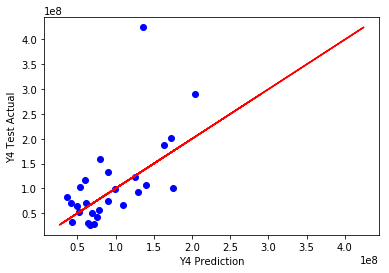

In [99]:
#actual vs prediction
plt.plot(lr4.predict(X4_test), y4_test, 'bo')
plt.xlabel("Y4 Prediction")
plt.ylabel("Y4 Test Actual")
plt.plot(y4_test, y4_test,'r')